In [23]:
#--------------------------------------------------------------------------#
#                                                                          #
#                     SCRIPT for basic statistic figures                   #
#                                                                          #
#                                                     BY   : 1.KM.Noh      #
#                                                            2.JH.Oh
#                                                            3.HG.Lim
#                                                     DATE : 2021.11.01    #
#                                                                          #
#--------------------------------------------------------------------------#

In [24]:
## Modules for Calculate netCDF 
import numpy    as np
import xarray   as xr
import netCDF4 
import pandas as pd

## Modules for caculating statistics
from scipy   import stats, signal
from sklearn import linear_model

## Modules for plottings
import matplotlib.pyplot as plt 
import matplotlib.colorbar as cb
import cartopy.crs as ccrs

plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'retina'

## Modules for modulating systems
import os
import warnings
warnings.filterwarnings('ignore')
#from mpl_toolkits.basemap import Basemap, shiftgrid

## Modules for POSTECH-CSL Basic functions 
from CSL_base import *
#import CSL_base

0. Make Result Directory

In [25]:
#### Make RESULT directory 
dir_name = "./RESULT"

if (os.path.isdir(dir_name)): print("RESULT Directory existed")
else:                         os.mkdir(dir_name)

RESULT Directory existed


1. OISSTv2 Reanalysis and Station Data
You can download OISSTv2 Reanalysis
URL : https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html
sst.mnmean.nc

In [32]:
#### Specify the range of lat, lon and time of SST data
latS = -89.5      ;   latN = 89.5
lonL = 0.5        ;   lonR = 359.5
yr_str = 1982    ;   yr_end = 2020


In [33]:
#### <Read SST from ERSST 
dir_name   =  "./DATA/"
file_name  =  "sst.mnmean.nc"
path_name  =  dir_name+file_name

## Open the netCDF4 file
var_name   =  "sst"  ;  SST = read_var_latlon_loc(path_name,var_name,yr_str,yr_end,
                                                               latS,latN,lonL,lonR)



2. Make the NINO3.4 index


In [34]:
#### Specify the Nino3.4 range of lat,lon 
latS_nino3 = -5.      ;    latN_nino3 = 5.
lonL_nino3 = 210.     ;    lonR_nino3 = 270.

NINO3_index = extract_index(SST,latS_nino3,latN_nino3,lonL_nino3,lonR_nino3)

In [35]:
#### Calculate climatology and anomalies of SST_index
clim_SST_index, anom_SST_index   =  calc_anomaly(NINO3_index)
clim_SST,       anom_SST         =  calc_anomaly(SST)

anom_SST_ann    = anom_SST.groupby("time.year").mean()
Nt_year, Ny, Nx = anom_SST_ann.shape

In [36]:
#### Remove trend of SST_index & Annual mean 
nino3_SST      =  detrend(anom_SST_index,"time",deg=1)
nion3_SST_ann  =  nino3_SST.groupby("time.year").mean()

season            = ["DJF","MAM","JJA","SON"]

3. Time-Series of NINO3


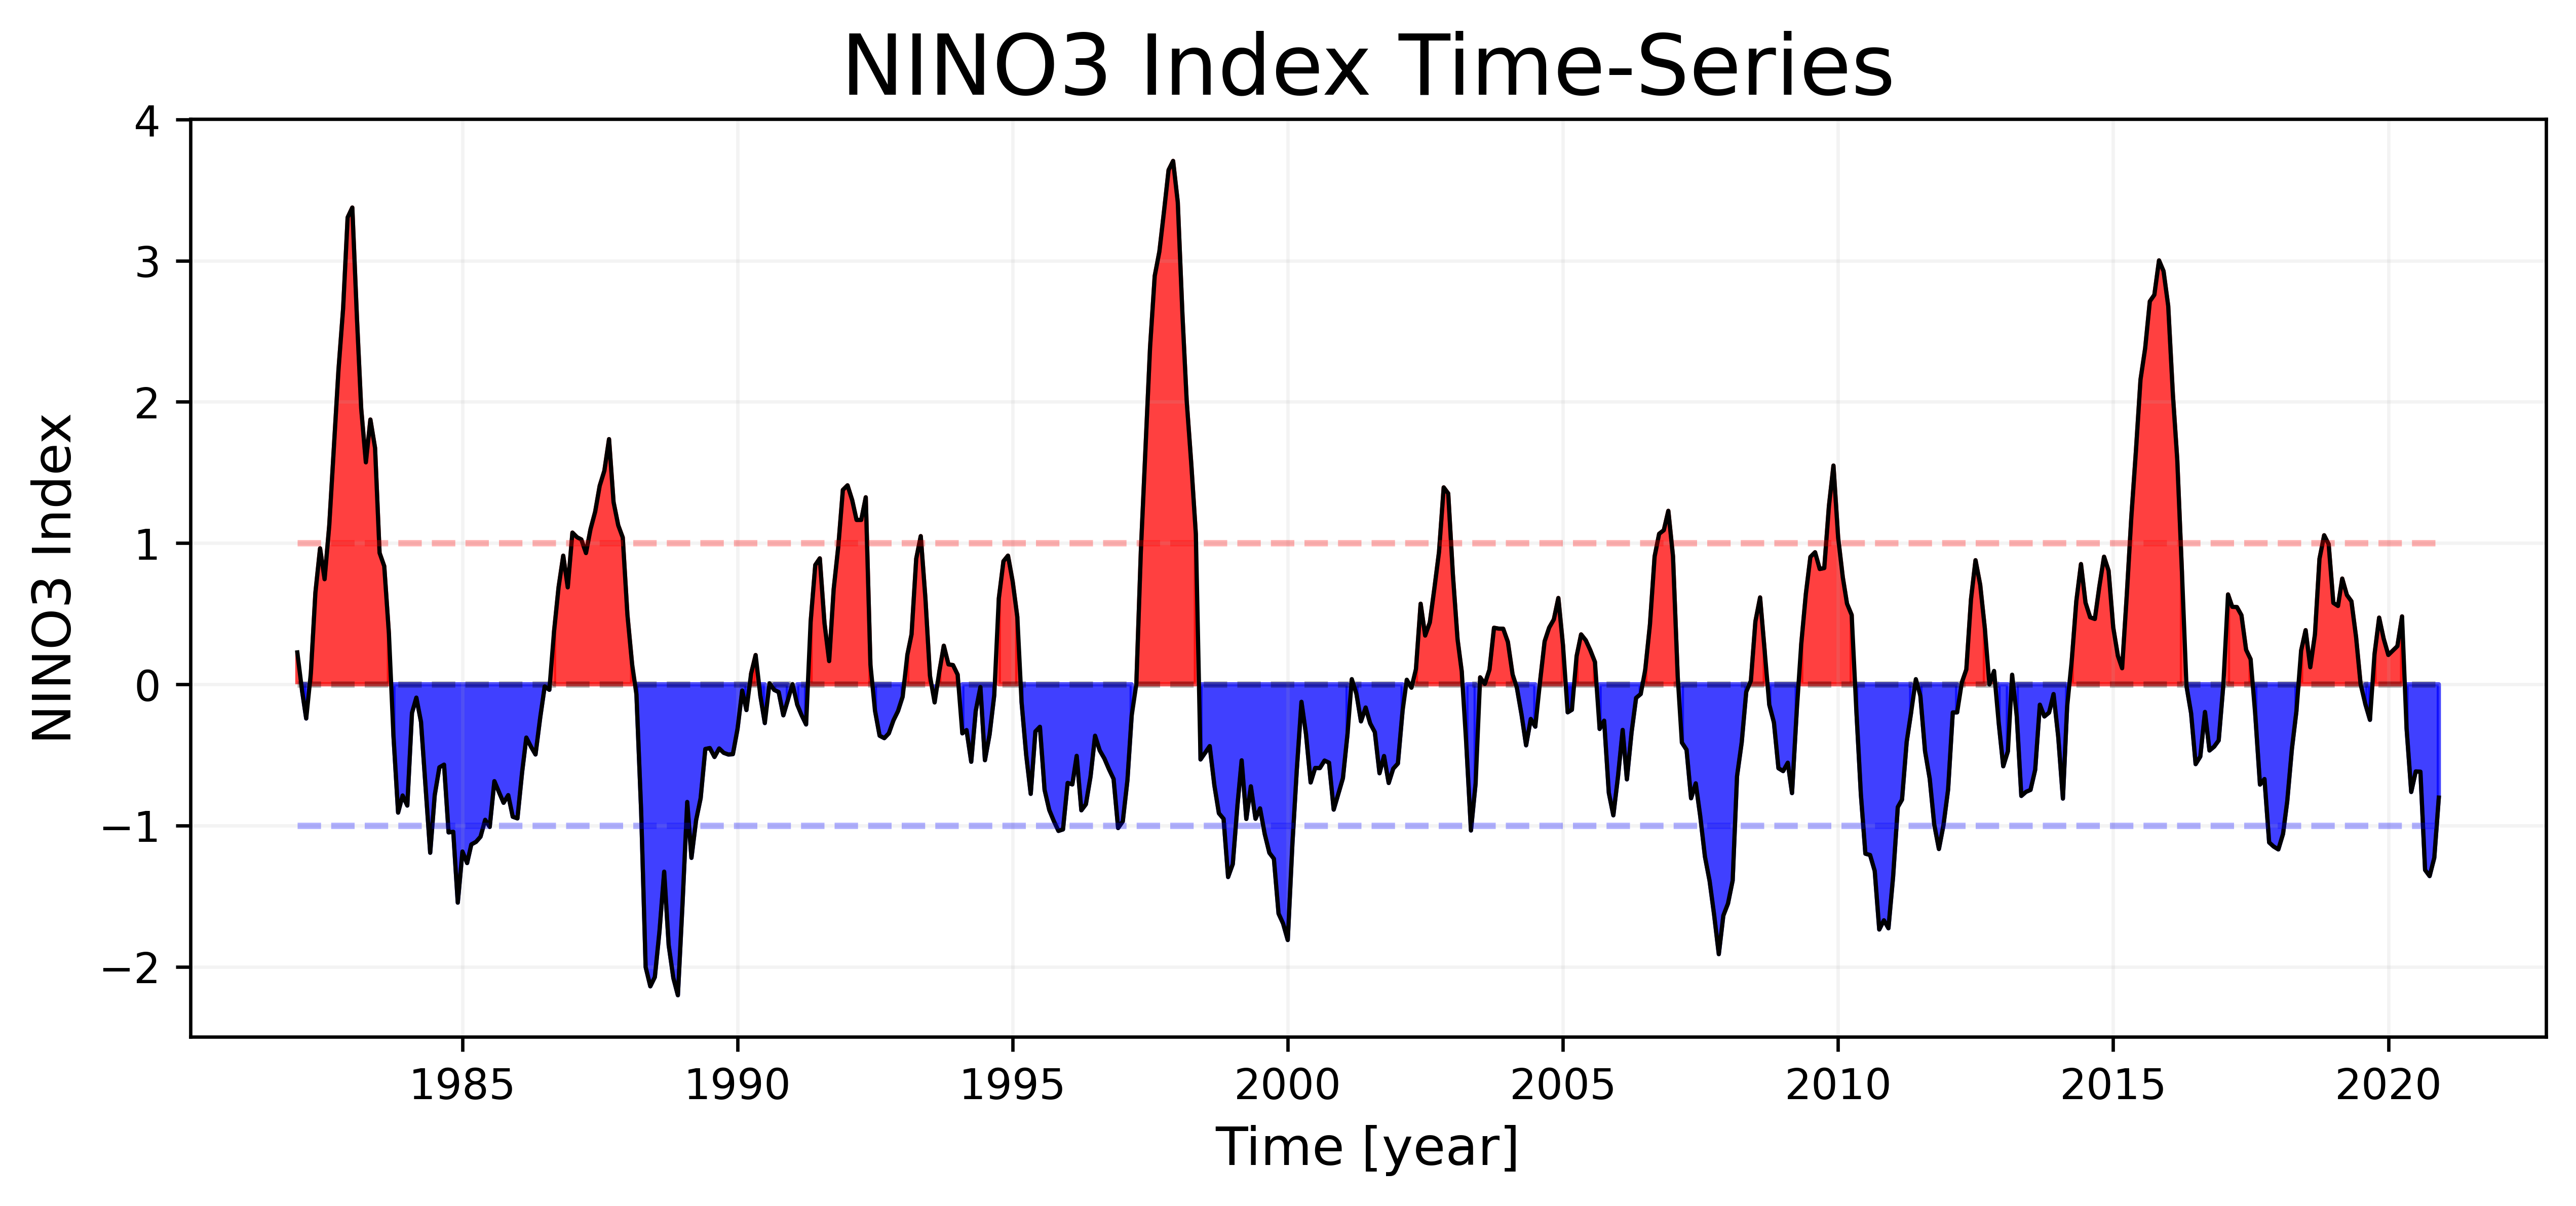

In [37]:
fig, axes = plt.subplots(1,1,figsize=(10,4))
time  = nino3_SST.time.values
index = nino3_SST/nino3_SST.std()


#### Plot Nino3 Time Series & Reference line (1 sigma)
axes.plot(time, index ,linewidth=1,color='k',label='Nino3')
axes.plot(time, np.zeros(len(time)),  '--',linewidth=1.5,color='k',alpha=0.3)
axes.plot(time, 1*np.ones(len(time)), '--',linewidth=1.5,color='r',alpha=0.3,label='$1\Sigma$')
axes.plot(time, -1*np.ones(len(time)),'--',linewidth=1.5,color='b',alpha=0.3,label='$-1\Sigma$')

#### Fill positive as red and negative as blue
axes.fill_between(time, index, 0, where = (index > 0), color='red', alpha=0.75)
axes.fill_between(time, index, 0, where = (index < 0), color='blue',alpha=0.75)

#### Detail plot properties
axes.set_xlabel("Time [year]",fontsize=12.5)
axes.set_ylabel("NINO3 Index",fontsize=12.5)
axes.set_title("NINO3 Index Time-Series",fontsize=20)
axes.grid(alpha=0.15)

#### <Save Time Series Figure to RESULT directory
dir_name   =  "./RESULT/"
file_name  =  "TS_Nino3.pdf"
path_name  =  dir_name+file_name
plt.savefig(path_name)